In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [12]:
data = pd.read_csv('/content/listings.csv')

In [13]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91031 entries, 0 to 91030
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            91031 non-null  int64  
 1   listing_url                                   91031 non-null  object 
 2   scrape_id                                     91031 non-null  int64  
 3   last_scraped                                  91031 non-null  object 
 4   source                                        91031 non-null  object 
 5   name                                          91031 non-null  object 
 6   description                                   87540 non-null  object 
 7   neighborhood_overview                         45896 non-null  object 
 8   picture_url                                   91030 non-null  object 
 9   host_id                                       91031 non-null 

In [14]:
selected_features = ['room_type', 'neighbourhood', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']
df = data[selected_features].dropna()

In [15]:
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [16]:
X = df.drop(columns=['price'])
y = df['price']

In [17]:
categorical_features = ['room_type', 'neighbourhood']
numerical_features = ['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds']

In [18]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [19]:
models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
    ])
}

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} - Mean Absolute Error: {mae}, Root Mean Squared Error: {rmse}\n")

Training Linear Regression...
Linear Regression - Mean Absolute Error: 163.91844549430508, Root Mean Squared Error: 762.9074311650442

Training Random Forest...
Random Forest - Mean Absolute Error: 173.99458422091638, Root Mean Squared Error: 770.1892395491051

Training XGBoost...
XGBoost - Mean Absolute Error: 175.25091732123397, Root Mean Squared Error: 767.2501463216105



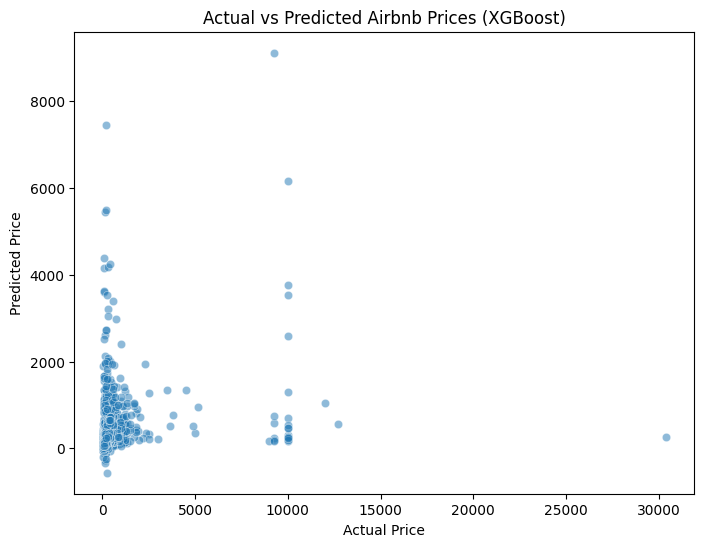

In [22]:
best_model = models['XGBoost']
y_pred_best = best_model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Airbnb Prices (XGBoost)')
plt.show()